# Lab 10 -  Reducing the error (misfit)

Assuming isostatic equilibrium and simple physical models of the cooling oceanic lithosphere, geologists have found that the depth of the ocean floor can be approximated by the equation:

$d = 2.5 + 0.36\sqrt{t}$

Where $d$ is the water depth in km, $2.5$ is the water depth in km over the spreading ridge (also known as the mid-ocean ridge), and $t$ is the time in millions of years (Ma).

**Problem statement**
For a particular ocean basin assume that it is perfectly symmetrical about the mid-ocean ridge axis and that the distance from the ridge to the subduction zone is 3,000 km.

1. Make a plot of depth to the ocean floor (in the vertical axis) and distance from the ridge, assuming that half-spreading rate is 5 cm/yr.<br>
2. Now assume that the spreading rate doubles to a half-rate of 10 cm/yr and assume that the half-width of the ocean basin (distance from spreading ridge) remains the same (3,000 km). Plot the result in the same plot of the point above labeling each bathymetric profile.
3. The file depth_ocean_floor.txt contains measurements of ocean depth relative to distance from the mid-ocean ridge. Plot the measurements in the same plot that you built in questions 1 and 2
4. Find the most approximate rate of motion of the oceanic plate by finding the rate at which the misfit of the bathymetry is at its minimum. The misfit can be found with the equation:

$ m = \sqrt{\frac{1}{N}\sum (D - d)^{2}} $ <br>, where $m$ is the misfit, $N$ is the total amount of data points in depth_ocean_floor.txt, $D$ is the measured depth, and $d$ is the depth found using equation 1.

5. Make a plot of plate speed vs misfit and show the point at which the misfit is at its minimum.

6. Plot the data points and the modeled bathymetry in a figure indicating the plate’s rate of motion and the misfit found, i.e., include your findings about the minimum error/correct velocity value in the first plot that you obtained indicating the ideal velocity for the measurements in the depth_ocean_floor.txt file. 


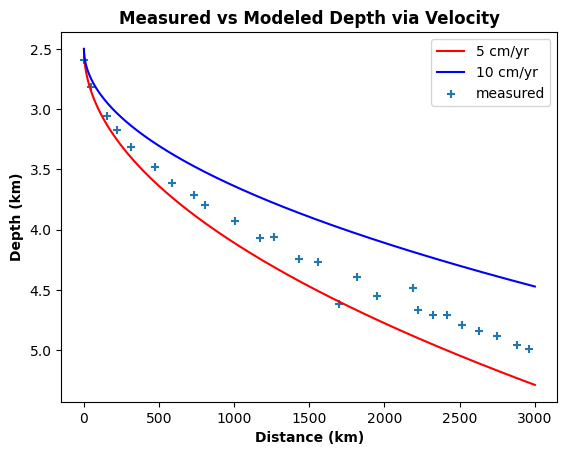

In [14]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import statistics as stat

#For Plot 1
fig, ax = plt.subplots() #figure
ax.set(xlabel='Distance from Ridge (km)');
ax.set(ylabel='Depth (km)');

#equations
def dEq(v, x): #takes in velocity (cm/yr), x
    v = 10 * v #converts plate speed from cm/yr to km/Ma
    return 2.5 + .36 * np.sqrt(x/v)

#Q1
rid2sub = np.arange(0,3001, .01)
ax.plot(rid2sub, dEq(5, rid2sub), color = 'r', label = '5 cm/yr'); #5cm/year

#Q2
ax.plot(rid2sub, dEq(10, rid2sub), color = 'b', label = '10 cm/yr'); #10cm/year

#Q3
do = pd.read_csv('depth_ocean_floor_v2.txt')
ax.scatter(do['distance_km'], do['depth_km'], marker = '+', label = 'measured');

ax.set_xlabel('Distance (km)', fontweight = 'bold')
ax.set_ylabel('Depth (km)', fontweight = 'bold')
ax.set_title('Measured vs Modeled Depth via Velocity', fontweight = 'bold');
ax.invert_yaxis()
ax.legend();


In [7]:
#For Plot 2
#Q4
rDepth = do['depth_km']
rDist = do['distance_km']
vel = np.arange(5,10,.01)
mDist = np.arange(0,3000,.01)
misfit = np.zeros(len(vel))
sub_mDepth = np.zeros(len(rDepth))

for i in range(len(vel)): #velocity in cm/yr (500)
    mDepth = dEq(vel[i],mDist) #distance in km, time in y

    for j in range(len(rDist)):
        minDif = np.min(abs(rDist[j] - mDist)) #holds the min difference for
        delta = abs(rDist[j] - mDist)
        idx = np.where(minDif == delta)
        sub_mDepth[j] = mDepth[idx]
        
    misfit[i] = np.sqrt(np.sum((rDepth - sub_mDepth)**2) / len(rDepth))


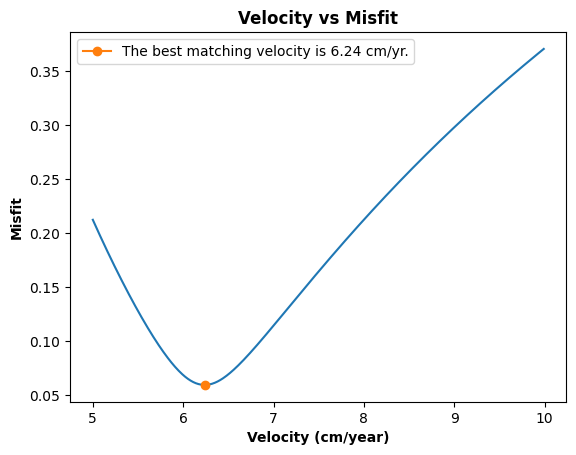

In [10]:
#Q5
#for min plot
idxMin = np.argmin(misfit)
minVel = vel[idxMin]
minMis = misfit[idxMin]


fig2, bx = plt.subplots()
bx.plot(vel, misfit);
bx.plot(minVel, minMis, marker='o', label = 'The best matching velocity is {:.2f} cm/yr.'.format(minVel));
bx.set_xlabel('Velocity (cm/year)', fontweight = 'bold');
bx.set_ylabel('Misfit', fontweight = 'bold');
bx.set_title('Velocity vs Misfit', fontweight = 'bold');
bx.legend();

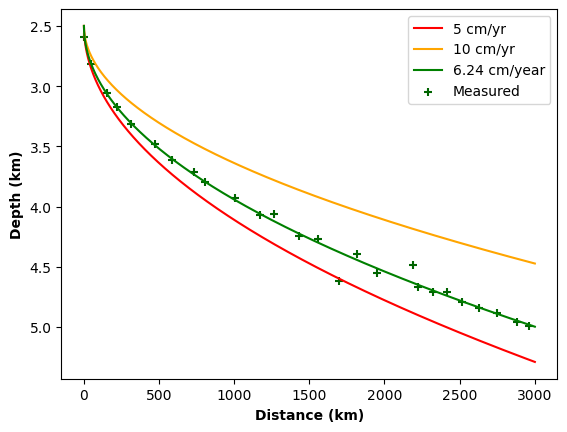

In [9]:
#Q6
fig3, cx = plt.subplots()
cx.plot(rid2sub, dEq(5, rid2sub), color = 'r', label = '5 cm/yr'); #5cm/year
cx.plot(rid2sub, dEq(10, rid2sub), color = 'orange', label = '10 cm/yr'); #10cm/year
cx.plot(rid2sub, dEq(minVel, rid2sub), color = 'green', label = '{:.2f} cm/year'.format(minVel))
cx.scatter(do['distance_km'], do['depth_km'], color = 'darkgreen', marker = '+', label = 'Measured');

cx.set_xlabel('Distance (km)', fontweight = 'bold');
cx.set_ylabel('Depth (km)', fontweight = 'bold');
cx.invert_yaxis();
cx.legend();